In [603]:
"""Import statements as required"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm # use stats models for basic linear regression
from scipy.stats import beta

In [604]:
"""Defining the data frame for the shootout from the csv file"""
df = pd.read_csv('https://raw.githubusercontent.com/pnandini-sdu/sp25-aai500-group2/refs/heads/main/Data/shootouts.csv')
df.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [605]:
#Calculating Home and Away teams winning data
home_wins = (df['winner'] == df['home_team']).sum()
away_wins = (df['winner'] == df['away_team']).sum()
total_matches = len(df)

#Cleaning data frame to remove rows where first shooter is not available
df_clean = df[df['first_shooter'].notna()]

# Resetting index in the DataFrame to reset the sequence
df_clean = df_clean.reset_index(drop=True)


In [606]:
#Calculting win rate of Home and Away teams
home_win_rate = home_wins / total_matches * 100
away_win_rate = away_wins / total_matches * 100

#Calculting win rate of First shooter
first_shooter_wins = (df_clean['winner'] == df_clean['first_shooter']).sum()
total_matches_clean = len(df_clean)
first_shooter_win_rate = first_shooter_wins / total_matches_clean * 100

#Printing win rate of Home, Away and First shooter
print("Home win percentage: {:.2f}".format(home_win_rate))
print("Away win percentage: {:.2f}".format(away_win_rate))
print("First shooter win percentage: {:.2f}".format(first_shooter_win_rate))

Home win percentage: 53.33
Away win percentage: 46.51
First shooter win percentage: 53.91


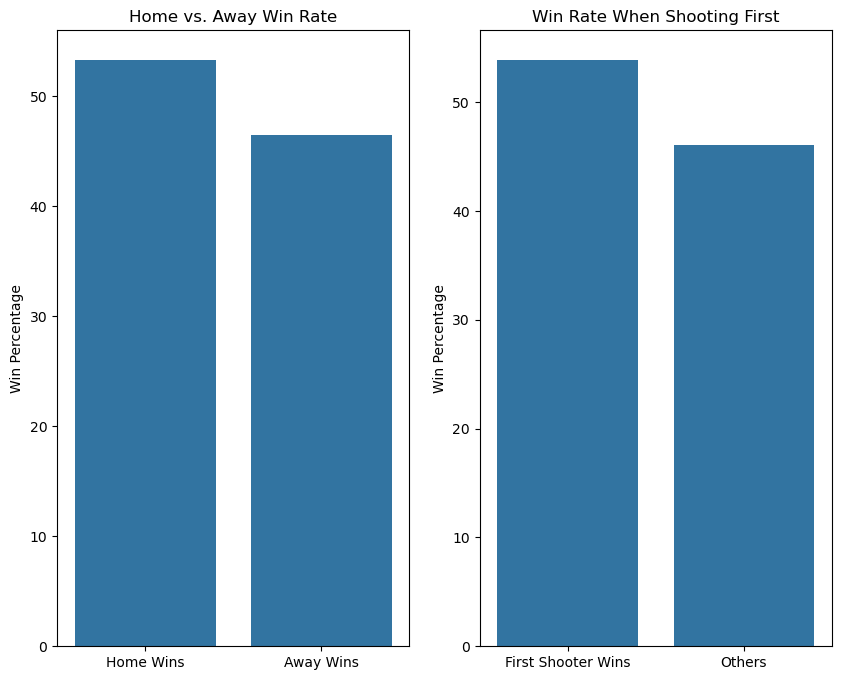

In [607]:
#Plotting Bar plots to visualize win rate for Home vs  Away teams and First Shooter.

#Home vs Away Win Rate
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
sns.barplot(x=['Home Wins', 'Away Wins'], y=[home_win_rate, away_win_rate])
plt.ylabel('Win Percentage')
plt.title('Home vs. Away Win Rate')

#First Shooter Impact
plt.subplot(1, 2, 2)
sns.barplot(x=['First Shooter Wins', 'Others'], y=[first_shooter_win_rate, 100 - first_shooter_win_rate])
plt.ylabel('Win Percentage')
plt.title('Win Rate When Shooting First')
plt.show()

In [608]:
# Adding the binary columns for each relevant field
df_clean['home_team_binary'] = (df_clean['home_team'] == df_clean['winner']).astype(int)
df_clean['away_team_binary'] = (df_clean['away_team'] == df_clean['winner']).astype(int)
df_clean['first_shooter_binary'] = (df_clean['first_shooter'] == df_clean['winner']).astype(int)
print(df_clean.head())

         date       home_team       away_team          winner   first_shooter  \
0  1976-06-20  Czechoslovakia         Germany  Czechoslovakia  Czechoslovakia   
1  1979-05-22       Argentina     Netherlands       Argentina       Argentina   
2  1980-06-21           Italy  Czechoslovakia  Czechoslovakia           Italy   
3  1982-07-08         Germany          France         Germany          France   
4  1984-06-24         Denmark           Spain           Spain         Denmark   

   home_team_binary  away_team_binary  first_shooter_binary  
0                 1                 0                     1  
1                 1                 0                     1  
2                 0                 1                     0  
3                 1                 0                     0  
4                 0                 1                     0  


In [609]:
# Creating a frequency tables - Winner and first shooter
winner_table = pd.crosstab(df_clean['winner'], df_clean['first_shooter'])

In [610]:
# Perform chi-square test to determine if there is a relationship between first shooter and winner
def  chisquare_test(table):
    stat, p_value, dof, expected = chi2_contingency(table, correction=False)
    # Interpret p-value
    alpha = 0.05
    print("The p-value is {:.2f}".format(p_value))
    if p_value <= alpha:
        print('Reject Null Hypothesis H0: There is a relationship between first shooter and winner.')
    else:
        print('Fail to reject Null Hypothesis Ha: There is no relationship between first shooter and winner.')

chisquare_test(winner_table)

The p-value is 0.00
Reject Null Hypothesis H0: There is a relationship between first shooter and winner.


In [611]:
#Calculating number of winning and first shooter for by country
winning_counts = df_clean['winner'].value_counts()
first_shooter_counts = df_clean['first_shooter'].value_counts()

#Creating new data frame to summarize - Country, Win count and First shooter count
country_data = pd.DataFrame({'country': winning_counts.index, 'win_count': winning_counts.values, 'first_shooter_count': first_shooter_counts.reindex(winning_counts.index, fill_value=0).values})
print(country_data.head())

     country  win_count  first_shooter_count
0  Argentina         14                    8
1     Brazil          9                    9
2    Uruguay          9                    8
3      Italy          7                   10
4     Mexico          7                    7


In [612]:
#Defining dependent variable Y for winner and independent variable X for first shooter
X = country_data[['first_shooter_count']]
y = country_data['win_count']

#Creating and fit the multiple regression model
regression_model = LinearRegression()
regression_model.fit(X,y)

#Get the coefficient and intercept
coefficients = regression_model.coef_
intercept = regression_model.intercept_

print("Coefficients(Slope):{:.2f}".format(coefficients[0]))
print("First Shooter:{:.2f}".format(coefficients[0]))
print("Intercept: {:.2f}".format(intercept))

#Predicted value of Winner country when they are also first shooter
#y_pred = regression_model.predict(X)
#print("Predicted value of winning by being fisrt shooter: ",y_pred)

X1 = sm.add_constant(X) # adds constant to the model
model = sm.OLS(y, X1).fit()
print(model.summary())

Coefficients(Slope):0.75
First Shooter:0.75
Intercept: 0.88
                            OLS Regression Results                            
Dep. Variable:              win_count   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           3.53e-19
Time:                        00:07:06   Log-Likelihood:                -146.70
No. Observations:                  83   AIC:                             297.4
Df Residuals:                      81   BIC:                             302.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [613]:
#describing country data
country_data.describe()

,win_count,first_shooter_count
count,83.000000,83.000000
mean,2.771084,2.518072
std,2.344299,2.476039
min,1.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,14.000000,11.000000


In [614]:
#Bayesian Inference

#(a)Given data
x_a = df_clean['first_shooter_binary'].sum()
n_a = total_matches_clean

#Assuming uniform beta prior(1,1)
alpha_prior = 1
beta_prior = 1

#Posterior parameters
alpha_posterior_fs = alpha_prior + x_a
beta_posterior_fs = beta_prior + (n_a - x_a)

#Compute posterior distribution
posterior_dist_fs = beta(alpha_posterior_fs,beta_posterior_fs)

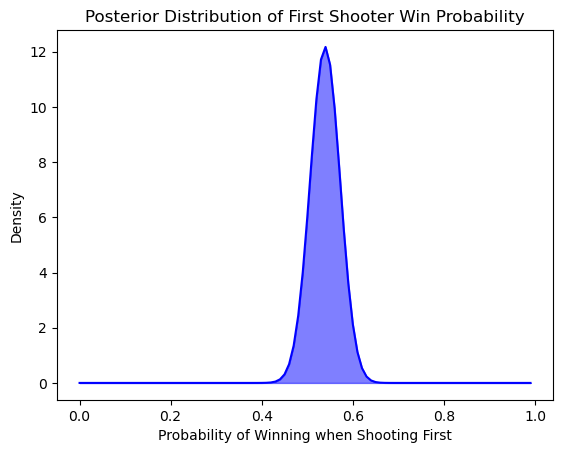

In [615]:
# Plot between -4 and 4 with .01 steps.
x_axis = np.arange(0, 1, 0.01)

# Plot the posterior distribution
plt.plot(x_axis, posterior_dist_fs.pdf(x_axis), label='Posterior Distribution', color='blue')
plt.fill_between(x_axis, posterior_dist_fs.pdf(x_axis), alpha=0.5, color='blue')
plt.title("Posterior Distribution of First Shooter Win Probability")
plt.xlabel("Probability of Winning when Shooting First")
plt.ylabel("Density")
plt.show()


In [616]:
#Calculating the point estimates
mean_estimate_fs = posterior_dist_fs.mean()
median_estimate_fs = posterior_dist_fs.median()

#Calculating credible interval
credible_interval_fs = posterior_dist_fs.interval(0.95)

print("The mean_estimate when first shooter is winner {:.2f}".format(mean_estimate_fs))
print("The median_estimate when first shooter is winner {:.2f}".format(median_estimate_fs))
print("The credible_interval when first shooter is winner [{:.2f},{:.2f}] ".format(credible_interval_fs[0], credible_interval_fs[1]))

The mean_estimate when first shooter is winner 0.54
The median_estimate when first shooter is winner 0.54
The credible_interval when first shooter is winner [0.47,0.60] 
